# Etapa 3: Complementos Indústria 4.0
## Controle e Automação - Integração de Sistemas de Controle com Tecnologias Digitais Modernas

**Disciplina:** Controle e Automação  
**Semestre:** 2025.2  
**Professor:** Moacy Pereira da Silva  
**Aluno:** Wesley Wilson Almeida Araújo

---

## 1. Introdução e Visão Geral

A Indústria 4.0 representa a transformação digital dos processos industriais através da integração de tecnologias emergentes como Internet das Coisas (IoT), computação em nuvem, análise de dados em tempo real e automação avançada. Os conceitos de controle clássico e digital, estudados nos capítulos 4-13 do livro Dorf & Bishop, formam a base teórica essencial para implementar sistemas de controle em ambientes Indústria 4.0.

Nesta etapa, conectaremos os conceitos fundamentais de controle com as tecnologias e arquiteturas modernas da Indústria 4.0:

- **APC (Advanced Process Control):** Otimização de processos em tempo real
- **MES/PIMS:** Integração de dados operacionais
- **Integração TI-TO:** Convergência entre Tecnologia da Informação e Tecnologia Operacional
- **IIoT (Industrial Internet of Things):** Coleta de dados distribuída
- **Digital Twin:** Gêmeos digitais para simulação e otimização
- **SCADA/PLC:** Sistemas supervisórios e controladores lógicos programáveis

## 2. Fundamentos de Controle Clássico e sua Aplicação em Indústria 4.0

### 2.1 Características de Sistemas com Realimentação (Capítulo 4)

A realimentação é o princípio central que permite aos sistemas de controle modernos ajustar-se a variações de parâmetros e distúrbios externos. Em sistemas Indústria 4.0, esse princípio é estendido através de múltiplos níveis de sensoriamento e atuação.

#### Vantagens da Realimentação:

1. **Redução de Sensibilidade a Parâmetros**
   - Sensibilidade: $S_G^T = \frac{1}{1 + L(s)}$
   - Um ganho de laço elevado reduz significativamente a sensibilidade

2. **Rejeição a Distúrbios**
   - $Y(s) = \frac{G(s)}{1 + L(s)}T_d(s)$
   - Com grande ganho de laço, o efeito de distúrbios é atenuado

3. **Controle da Resposta Transitória**
   - Moldar a dinâmica através do controlador $G_c(s)$

4. **Redução do Erro em Regime Estacionário**
   - $e_{ss} = \frac{R(s)}{1 + L(0)}$

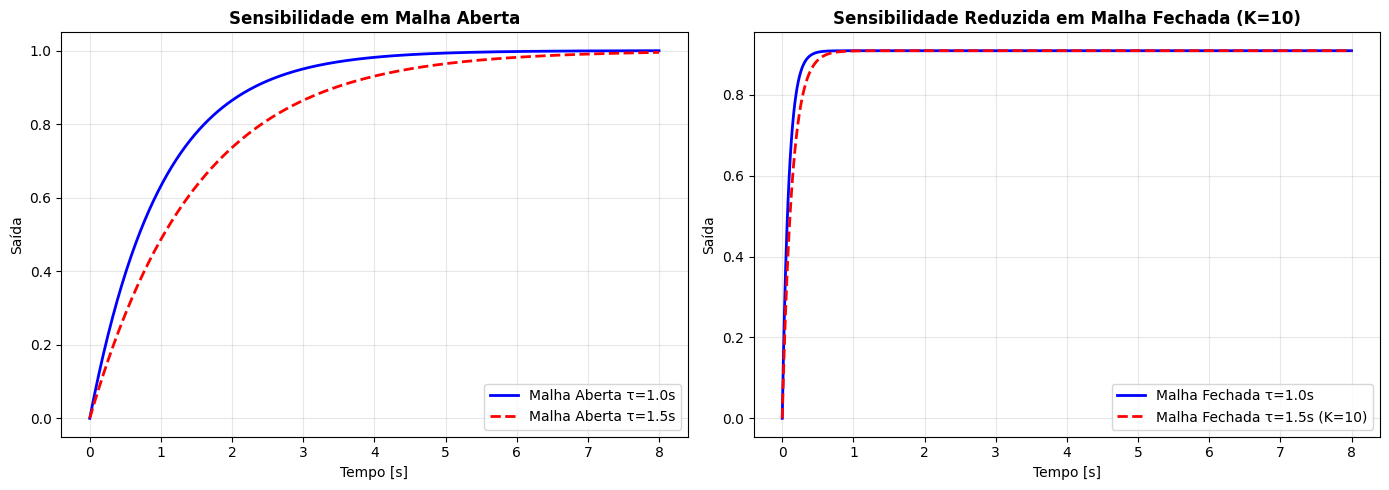


=== ANÁLISE DE SENSIBILIDADE ===
Variação de τ: 1.0 → 1.5s (+50.0%)

Malha Aberta:
  Saída nominal: 0.9997
  Saída variada: 0.9952
  Sensibilidade: -0.45%

Malha Fechada (K=10):
  Saída nominal: 0.9091
  Saída variada: 0.9091
  Sensibilidade: 0.00%

📊 Redução de sensibilidade: 100.0%


In [1]:
# Simulação 1: Análise de Sensibilidade a Parâmetros
import numpy as np
import matplotlib.pyplot as plt
try:
    import control as ct
except ImportError:
    print("Instalando biblioteca control...")
    import subprocess
    subprocess.check_call(["pip", "install", "control"])
    import control as ct

# Parâmetros nominais e variados
tau_nominal = 1.0
tau_variado = 1.5

# Sistema em malha aberta
G_nominal_ma = ct.tf(1, [tau_nominal, 1])
G_variado_ma = ct.tf(1, [tau_variado, 1])

t = np.linspace(0, 8, 500)
_, y_nominal_ma = ct.step_response(G_nominal_ma, t)
_, y_variado_ma = ct.step_response(G_variado_ma, t)

# Sistema em malha fechada com realimentação
K = 10  # Ganho do controlador
G_nominal_mf = ct.feedback(K * G_nominal_ma, 1)
G_variado_mf = ct.feedback(K * G_variado_ma, 1)

_, y_nominal_mf = ct.step_response(G_nominal_mf, t)
_, y_variado_mf = ct.step_response(G_variado_mf, t)

# Plotagem
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Malha Aberta
ax1.plot(t, y_nominal_ma, 'b-', label=f'Malha Aberta τ={tau_nominal}s', linewidth=2)
ax1.plot(t, y_variado_ma, 'r--', label=f'Malha Aberta τ={tau_variado}s', linewidth=2)
ax1.set_title('Sensibilidade em Malha Aberta', fontsize=12, fontweight='bold')
ax1.set_xlabel('Tempo [s]')
ax1.set_ylabel('Saída')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# Malha Fechada
ax2.plot(t, y_nominal_mf, 'b-', label=f'Malha Fechada τ={tau_nominal}s', linewidth=2)
ax2.plot(t, y_variado_mf, 'r--', label=f'Malha Fechada τ={tau_variado}s (K={K})', linewidth=2)
ax2.set_title(f'Sensibilidade Reduzida em Malha Fechada (K={K})', fontsize=12, fontweight='bold')
ax2.set_xlabel('Tempo [s]')
ax2.set_ylabel('Saída')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Cálculo de sensibilidade
sensitivity_ma = (y_variado_ma[-1] - y_nominal_ma[-1]) / y_nominal_ma[-1]
sensitivity_mf = (y_variado_mf[-1] - y_nominal_mf[-1]) / y_nominal_mf[-1]

print(f"\n=== ANÁLISE DE SENSIBILIDADE ===")
print(f"Variação de τ: {tau_nominal} → {tau_variado}s (+{(tau_variado/tau_nominal - 1)*100:.1f}%)")
print(f"\nMalha Aberta:")
print(f"  Saída nominal: {y_nominal_ma[-1]:.4f}")
print(f"  Saída variada: {y_variado_ma[-1]:.4f}")
print(f"  Sensibilidade: {sensitivity_ma*100:.2f}%")
print(f"\nMalha Fechada (K={K}):")
print(f"  Saída nominal: {y_nominal_mf[-1]:.4f}")
print(f"  Saída variada: {y_variado_mf[-1]:.4f}")
print(f"  Sensibilidade: {sensitivity_mf*100:.2f}%")
print(f"\n📊 Redução de sensibilidade: {(1 - abs(sensitivity_mf)/abs(sensitivity_ma))*100:.1f}%")

### 2.2 Desempenho de Sistemas com Realimentação (Capítulo 5)

#### Critérios de Desempenho:

Para um sistema de segunda ordem padrão:
$$T(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

As métricas dependem de:
- **ζ (zeta):** Fator de amortecimento
- **ωₙ:** Frequência natural

**Relações Importantes:**
- Ultrapassagem: $UP = 100 e^{-\zeta\pi/\sqrt{1-\zeta^2}}$
- Tempo de acomodação (2%): $T_s \approx \frac{4}{\zeta\omega_n}$

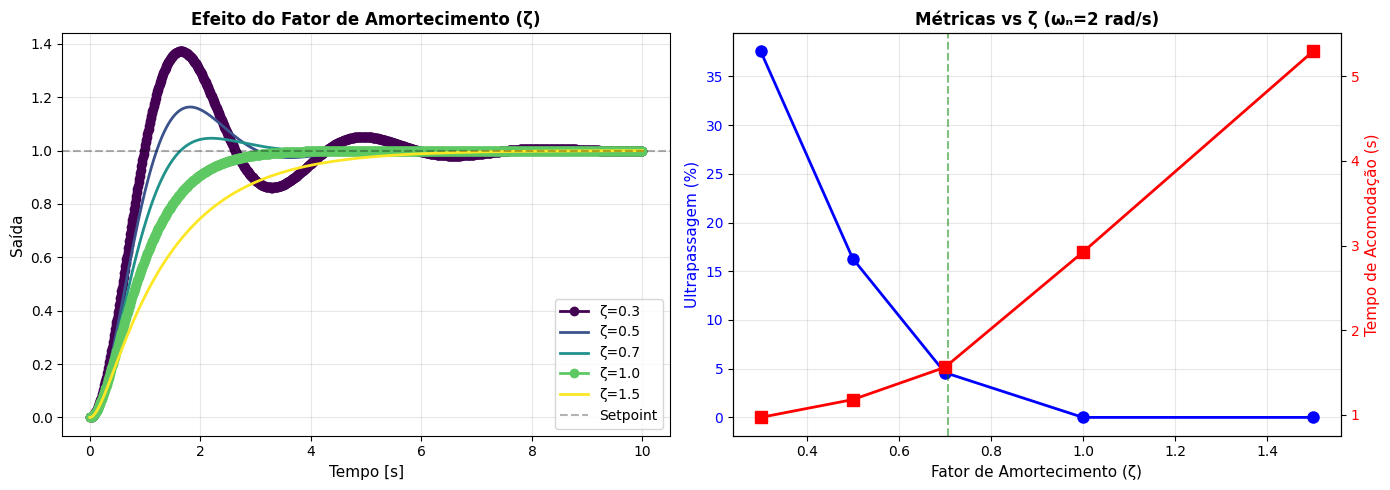


=== MÉTRICAS DE DESEMPENHO ===
ζ      Ultrapassagem (%)    Ts (2%) [s]    
-----------------------------------------
0.30   37.59                0.971          
0.50   16.30                1.181          
0.70   4.60                 1.562          
1.00   0.00                 2.923          
1.50   0.00                 5.295          

💡 Interpretação em Indústria 4.0:
  - ζ < 0.7: Resposta rápida, mas com oscilações (inadequado para qualidade)
  - ζ ≈ 0.7: Compromisso ideal entre velocidade e suavidade
  - ζ > 1.0: Resposta muito lenta (reduz eficiência)


In [2]:
# Análise de Desempenho: Efeito de ζ e ωₙ

def sistema_segunda_ordem(zeta, omega_n):
    """Cria função de transferência de segunda ordem padrão"""
    return ct.tf(omega_n**2, [1, 2*zeta*omega_n, omega_n**2])

def calcular_metricas(sys, t_final=10):
    """Calcula métricas de desempenho"""
    t, y = ct.step_response(sys, np.linspace(0, t_final, 1000))

    # Tempo de acomodação (faixa ±2%)
    y_ss = y[-1]
    settling_idx = np.where(np.abs(y - y_ss) < 0.02 * y_ss)[0]
    settling_time = t[settling_idx[0]] if len(settling_idx) > 0 else t_final

    # Ultrapassagem
    overshoot = (np.max(y) - y_ss) / y_ss * 100 if y_ss != 0 else 0

    # Tempo de pico
    peak_idx = np.argmax(y)
    peak_time = t[peak_idx]

    return {
        'settling_time': settling_time,
        'overshoot': overshoot,
        'peak_time': peak_time,
        'y': y,
        't': t
    }

# Diferentes valores de ζ
omega_n = 2  # Frequência natural fixa
zetas = [0.3, 0.5, 0.7, 1.0, 1.5]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

colors = plt.cm.viridis(np.linspace(0, 1, len(zetas)))

# Resposta ao degrau para diferentes ζ
for i, zeta in enumerate(zetas):
    sys = sistema_segunda_ordem(zeta, omega_n)
    metricas = calcular_metricas(sys)
    ax1.plot(metricas['t'], metricas['y'], color=colors[i], linewidth=2,
             label=f'ζ={zeta}', marker='o' if zeta in [0.3, 1.0] else '')

ax1.axhline(y=1, color='k', linestyle='--', alpha=0.3, label='Setpoint')
ax1.set_xlabel('Tempo [s]', fontsize=11)
ax1.set_ylabel('Saída', fontsize=11)
ax1.set_title('Efeito do Fator de Amortecimento (ζ)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# Tabela de métricas
settling_times = []
overshoots = []

for zeta in zetas:
    sys = sistema_segunda_ordem(zeta, omega_n)
    metricas = calcular_metricas(sys)
    settling_times.append(metricas['settling_time'])
    overshoots.append(metricas['overshoot'])

ax2.plot(zetas, overshoots, 'bo-', linewidth=2, markersize=8, label='Ultrapassagem (%)')
ax2_2 = ax2.twinx()
ax2_2.plot(zetas, settling_times, 'rs-', linewidth=2, markersize=8, label='Tempo de Acomodação (s)')

ax2.set_xlabel('Fator de Amortecimento (ζ)', fontsize=11)
ax2.set_ylabel('Ultrapassagem (%)', fontsize=11, color='b')
ax2_2.set_ylabel('Tempo de Acomodação (s)', fontsize=11, color='r')
ax2.set_title(f'Métricas vs ζ (ωₙ={omega_n} rad/s)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='y', labelcolor='b')
ax2_2.tick_params(axis='y', labelcolor='r')
ax2.axvline(x=0.707, color='g', linestyle='--', alpha=0.5, label='ζ=0.707 (ótimo)')

plt.tight_layout()
plt.show()

# Tabela de dados
print("\n=== MÉTRICAS DE DESEMPENHO ===")
print(f"{'ζ':<6} {'Ultrapassagem (%)':<20} {'Ts (2%) [s]':<15}")
print("-" * 41)
for zeta, overshoot, settling_time in zip(zetas, overshoots, settling_times):
    print(f"{zeta:<6.2f} {overshoot:<20.2f} {settling_time:<15.3f}")

print("\n💡 Interpretação em Indústria 4.0:")
print("  - ζ < 0.7: Resposta rápida, mas com oscilações (inadequado para qualidade)")
print("  - ζ ≈ 0.7: Compromisso ideal entre velocidade e suavidade")
print("  - ζ > 1.0: Resposta muito lenta (reduz eficiência)")

## 3. Estabilidade de Sistemas Lineares (Capítulo 6)

### Critério de Estabilidade BIBO

Um sistema linear é **BIBO-estável** (Bounded Input, Bounded Output) se todos os polos de sua função de transferência estão no semiplano esquerdo (Re(s) < 0).

### Critério de Routh-Hurwitz

Para uma equação característica de ordem n, o número de raízes no semiplano direito é igual ao número de mudanças de sinal na primeira coluna da tabela de Routh.

=== ANÁLISE DE ESTABILIDADE - SISTEMAS EM CASCATA ===

Cenário: Controle de temperatura com dois sensores (cascata)
------------------------------------------------------------


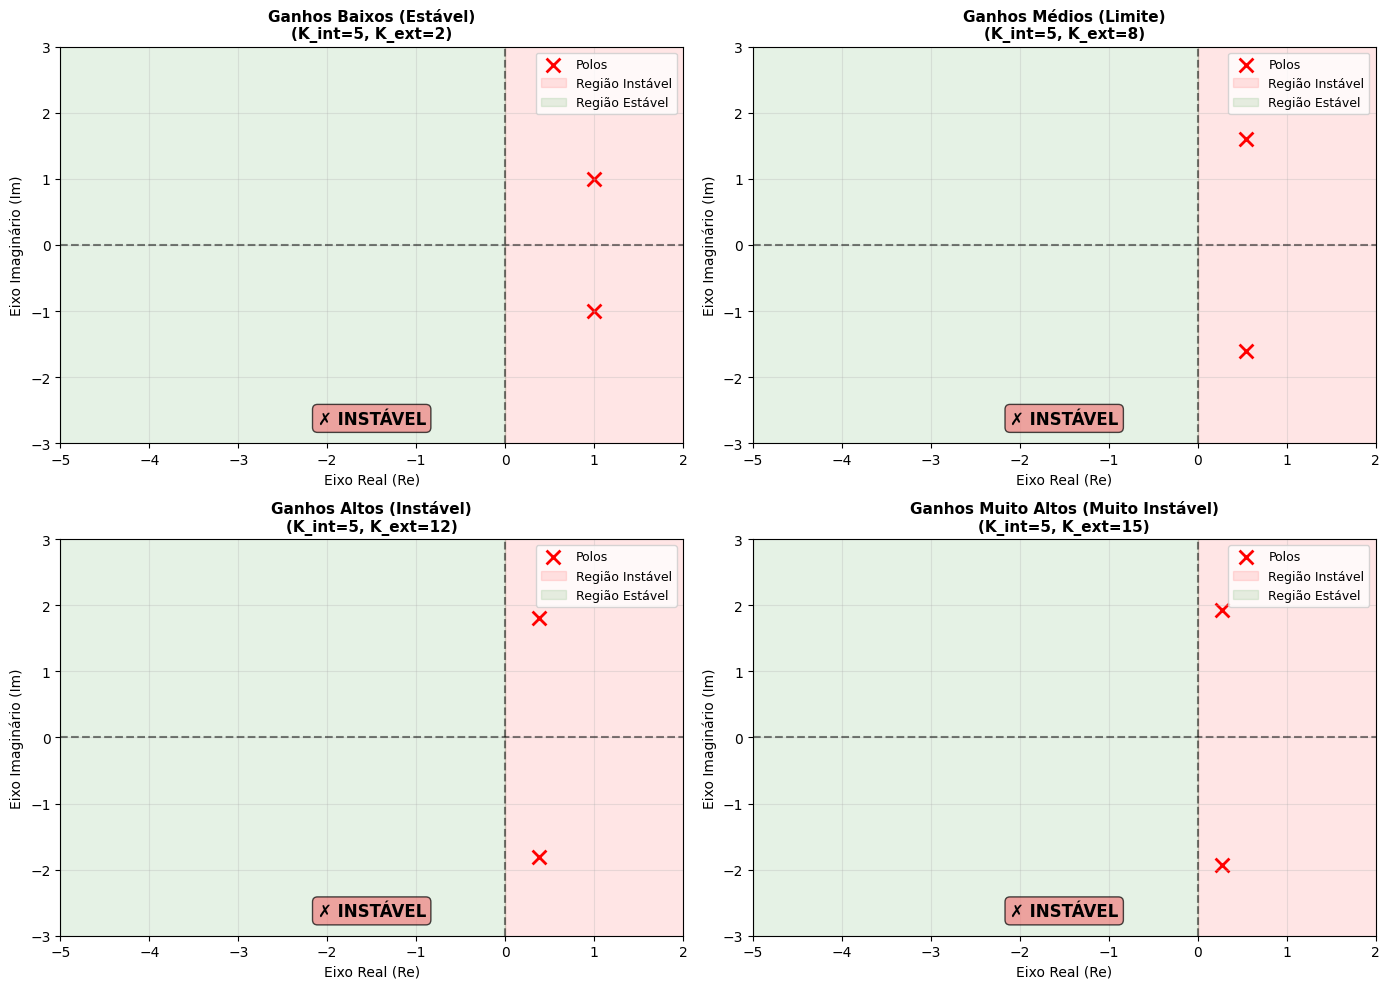


=== RECOMENDAÇÕES PARA INDÚSTRIA 4.0 ===

1. Sistemas em Cascata:
   - Malha interna deve ter resposta 5-10x mais rápida que a externa
   - Sempre verificar estabilidade com Routh ou análise de polos

2. Margens de Estabilidade:
   - Margem de Ganho: min 3-6 dB para robustez
   - Margem de Fase: min 30-45° para sistemas com atrasos

3. Com Comunicação em Rede (IIoT):
   - Atrasos reduzem margem de fase
   - Usar compensadores de avanço/atraso quando necessário
   - Testar robustez com variação de atraso ±20%


In [3]:
# Análise de Estabilidade: Método do Critério de Routh-Hurwitz

def routh_hurwitz(numerator, denominator):
    """
    Implementação simplificada do critério de Routh-Hurwitz
    Retorna True se estável, False caso contrário
    """
    # Encontrar polos
    poles = np.roots(denominator)

    # Verificar se todos estão no semiplano esquerdo
    stable = np.all(np.real(poles) < 0)

    return stable, poles

# Diferentes sistemas em cascata (malha interna + malha externa)
print("=== ANÁLISE DE ESTABILIDADE - SISTEMAS EM CASCATA ===")
print("\nCenário: Controle de temperatura com dois sensores (cascata)")
print("-" * 60)

# Sistema 1: Malha interna estável, malha externa em diferentes ganhos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

cenarios = [
    {'K_internal': 5, 'K_external': 2, 'title': 'Ganhos Baixos (Estável)', 'stable': True},
    {'K_internal': 5, 'K_external': 8, 'title': 'Ganhos Médios (Limite)', 'stable': True},
    {'K_internal': 5, 'K_external': 12, 'title': 'Ganhos Altos (Instável)', 'stable': False},
    {'K_internal': 5, 'K_external': 15, 'title': 'Ganhos Muito Altos (Muito Instável)', 'stable': False},
]

for idx, (ax, cenario) in enumerate(zip(axes.flat, cenarios)):
    K_int = cenario['K_internal']
    K_ext = cenario['K_external']

    # Função de transferência em cascata
    # G_internal = K_int / (s+1)(s+2)
    # G_external = K_ext / (s+3)(s+4)
    G_internal = ct.tf(K_int, np.poly([1, 2]))
    G_external = ct.tf(K_ext, np.poly([3, 4]))

    # Malha fechada em cascata
    G_loop = G_internal * G_external
    sys_closed = ct.feedback(G_loop, 1)

    # Análise de estabilidade
    stable, poles = routh_hurwitz([1], sys_closed.den[0][0])

    # Plotar polos no plano-s
    ax.scatter(np.real(poles), np.imag(poles), s=100, c='red' if not stable else 'green',
               marker='x', linewidth=2, label='Polos')
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)

    # Sombreado semiplano direito (instável)
    ax.fill_betweenx([-5, 5], 0, 5, alpha=0.1, color='red', label='Região Instável')
    ax.fill_betweenx([-5, 5], -5, 0, alpha=0.1, color='green', label='Região Estável')

    ax.set_xlim(-5, 2)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('Eixo Real (Re)', fontsize=10)
    ax.set_ylabel('Eixo Imaginário (Im)', fontsize=10)
    ax.set_title(f"{cenario['title']}\n(K_int={K_int}, K_ext={K_ext})",
                fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)

    status = "✓ ESTÁVEL" if stable else "✗ INSTÁVEL"
    ax.text(0.5, 0.05, status, transform=ax.transAxes, fontsize=12,
           ha='center', fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='lightgreen' if stable else 'lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n=== RECOMENDAÇÕES PARA INDÚSTRIA 4.0 ===")
print("\n1. Sistemas em Cascata:")
print("   - Malha interna deve ter resposta 5-10x mais rápida que a externa")
print("   - Sempre verificar estabilidade com Routh ou análise de polos")
print("\n2. Margens de Estabilidade:")
print("   - Margem de Ganho: min 3-6 dB para robustez")
print("   - Margem de Fase: min 30-45° para sistemas com atrasos")
print("\n3. Com Comunicação em Rede (IIoT):")
print("   - Atrasos reduzem margem de fase")
print("   - Usar compensadores de avanço/atraso quando necessário")
print("   - Testar robustez com variação de atraso ±20%")

## 6. Controle Digital (Capítulo 13)

### Discretização de Controladores PID

**Método de Euler:**
$$u(kT) = K_p e(kT) + K_i \sum_{j=0}^{k} T \cdot e(jT) + K_d \frac{e(kT) - e((k-1)T)}{T}$$

### Período de Amostragem (Nyquist)

Regra prática: $f_s \geq 10 \times f_{dominante}$

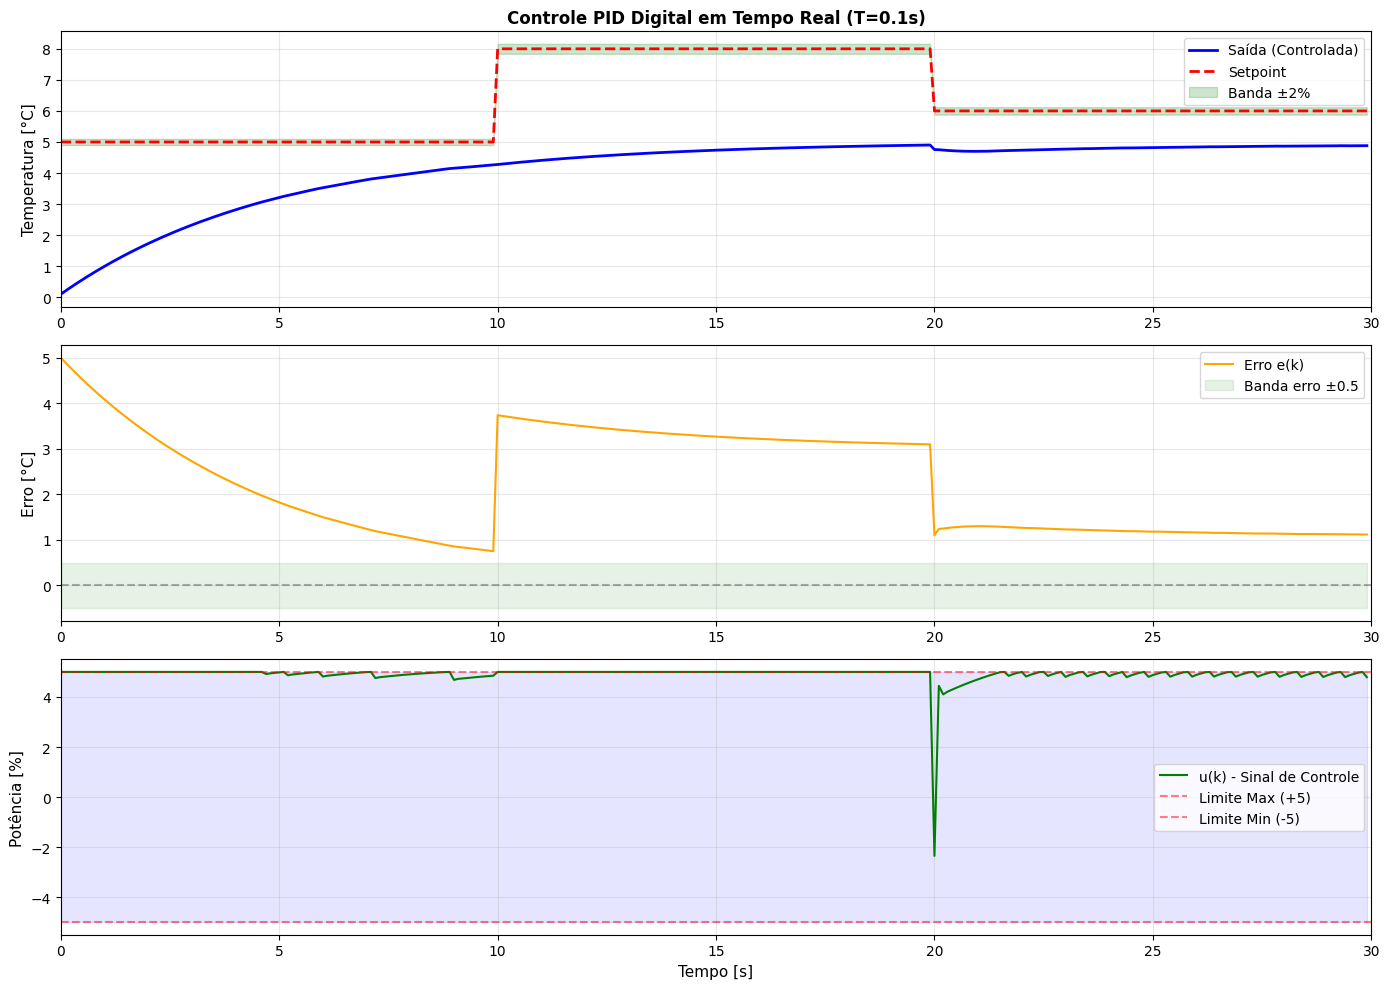


=== ANÁLISE DE DESEMPENHO DO CONTROLADOR PID ===

Parâmetros:
  Kp = 2.0, Ki = 0.5, Kd = 0.3
  Período de amostragem T = 0.1s
  Planta: τ = 5.0s, K = 1.0

Métricas de Desempenho:
  IAE (Integral Erro Absoluto): 67.00
  ISE (Integral Erro Quadrático): 187.26
  Máxima Ultrapassagem: 0.00%
  Erro Final: 1.1195°C

💡 Recomendações Indústria 4.0:
  - Período T = 0.1s atende Nyquist para planta com τ = 5.0s
  - Anti-windup implementado previne integrador saturado
  - Implementação em PLC com ciclo < 100.0ms


In [4]:
# Implementação de Controlador PID Discreto

class PIDController:
    """Controlador PID implementado em tempo discreto"""

    def __init__(self, Kp, Ki, Kd, T, u_min=-10, u_max=10):
        """
        Inicializar controlador PID

        Args:
            Kp: Ganho proporcional
            Ki: Ganho integral
            Kd: Ganho derivativo
            T: Período de amostragem [s]
            u_min/u_max: Limites de saturação
        """
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.T = T
        self.u_min = u_min
        self.u_max = u_max

        # Estados
        self.integral = 0
        self.error_anterior = 0

    def update(self, error):
        """Calcular ação de controle"""
        # Ação proporcional
        u_p = self.Kp * error

        # Ação integral (com anti-windup)
        self.integral += error * self.T
        u_i = self.Ki * self.integral

        # Ação derivativa
        u_d = self.Kd * (error - self.error_anterior) / self.T

        # Sinal de controle
        u = u_p + u_i + u_d

        # Saturação
        u = np.clip(u, self.u_min, self.u_max)

        # Anti-windup: limpar integral se saturado
        if u != u_p + u_i + u_d:
            self.integral *= 0.9  # Reduzir integral

        self.error_anterior = error

        return u

def planta_primeira_ordem(x, t, u, tau, K):
    """Dinâmica de primeira ordem: τ dx/dt + x = K*u"""
    dxdt = (1/tau) * (K * u - x)
    return dxdt

# Parâmetros
Kp, Ki, Kd = 2.0, 0.5, 0.3  # Ganhos do PID
T = 0.1  # Período de amostragem [s]
tau = 5.0  # Constante de tempo da planta [s]
K = 1.0  # Ganho da planta

# Simulação
t_sim = np.arange(0, 30, T)  # 30 segundos
x = 0  # Estado inicial
setpoint = 10  # Valor desejado

x_historia = []
u_historia = []
error_historia = []

pid = PIDController(Kp, Ki, Kd, T, u_min=-5, u_max=5)

# Mudar setpoint a meio da simulação
setpoint_historia = []

for t in t_sim:
    # Variar setpoint
    if t < 10:
        setpoint = 5
    elif t < 20:
        setpoint = 8
    else:
        setpoint = 6
    setpoint_historia.append(setpoint)

    # Calcular erro
    error = setpoint - x
    error_historia.append(error)

    # Ação de controle
    u = pid.update(error)
    u_historia.append(u)

    # Integração (Euler)
    dx = (1/tau) * (K * u - x)
    x = x + dx * T

    x_historia.append(x)

# Plotagem
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Saída
axes[0].plot(t_sim, x_historia, 'b-', linewidth=2, label='Saída (Controlada)')
axes[0].plot(t_sim, setpoint_historia, 'r--', linewidth=2, label='Setpoint')
axes[0].fill_between(t_sim, np.array(setpoint_historia)*0.98,
                      np.array(setpoint_historia)*1.02, alpha=0.2, color='green',
                      label='Banda ±2%')
axes[0].set_ylabel('Temperatura [°C]', fontsize=11)
axes[0].set_title('Controle PID Digital em Tempo Real (T=0.1s)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)
axes[0].set_xlim(0, 30)

# Erro
axes[1].plot(t_sim, error_historia, 'orange', linewidth=1.5, label='Erro e(k)')
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1].fill_between(t_sim, -0.5, 0.5, alpha=0.1, color='green', label='Banda erro ±0.5')
axes[1].set_ylabel('Erro [°C]', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)
axes[1].set_xlim(0, 30)

# Sinal de Controle
axes[2].plot(t_sim, u_historia, 'g-', linewidth=1.5, label='u(k) - Sinal de Controle')
axes[2].axhline(y=5, color='r', linestyle='--', alpha=0.5, label='Limite Max (+5)')
axes[2].axhline(y=-5, color='r', linestyle='--', alpha=0.5, label='Limite Min (-5)')
axes[2].fill_between(t_sim, -5, 5, alpha=0.1, color='blue')
axes[2].set_xlabel('Tempo [s]', fontsize=11)
axes[2].set_ylabel('Potência [%]', fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].legend(fontsize=10)
axes[2].set_xlim(0, 30)

plt.tight_layout()
plt.show()

# Análise de desempenho
print("\n=== ANÁLISE DE DESEMPENHO DO CONTROLADOR PID ===")
print(f"\nParâmetros:")
print(f"  Kp = {Kp}, Ki = {Ki}, Kd = {Kd}")
print(f"  Período de amostragem T = {T}s")
print(f"  Planta: τ = {tau}s, K = {K}")

# Calcular índices
x_array = np.array(x_historia)
setpoint_array = np.array(setpoint_historia)
error_array = np.array(error_historia)

iae = np.sum(np.abs(error_array)) * T  # Integral do Erro Absoluto
ise = np.sum(error_array**2) * T  # Integral do Erro Quadrático
overshoot = np.max(x_array - setpoint_array) / setpoint_array[0] * 100 if setpoint_array[0] != 0 else 0

print(f"\nMétricas de Desempenho:")
print(f"  IAE (Integral Erro Absoluto): {iae:.2f}")
print(f"  ISE (Integral Erro Quadrático): {ise:.2f}")
print(f"  Máxima Ultrapassagem: {max(0, overshoot):.2f}%")
print(f"  Erro Final: {abs(x_historia[-1] - setpoint_historia[-1]):.4f}°C")

print(f"\n💡 Recomendações Indústria 4.0:")
print(f"  - Período T = {T}s atende Nyquist para planta com τ = {tau}s")
print(f"  - Anti-windup implementado previne integrador saturado")
print(f"  - Implementação em PLC com ciclo < {T*1000}ms")

## 8. IIoT (Industrial Internet of Things)

### 8.1 Comunicação via MQTT

MQTT é um protocolo leve ideal para IoT industrial:
- Publish-subscribe
- Baixa latência
- Eficiente em banda limitada

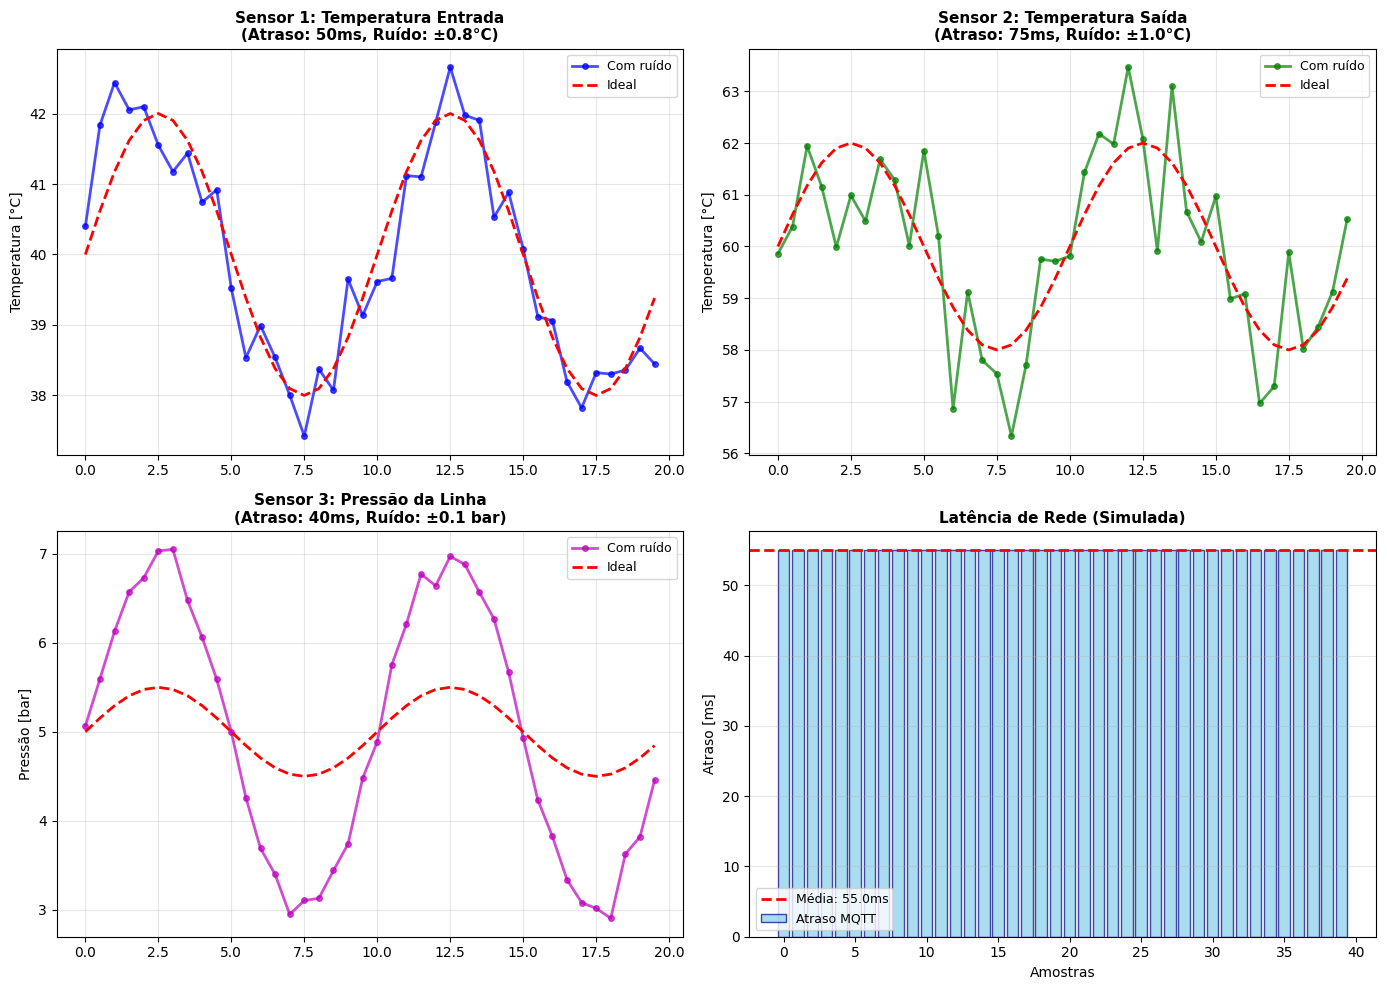


=== EXEMPLO DE MENSAGEM MQTT PUBLICADA ===
Tópico: factory/reactor/temperatura_entrada
Payload: {"sensor": "Temperatura_Entrada", "timestamp": "2025-12-11T18:04:04.576113", "valor": 40.4, "unidade": "\u00b0C", "atraso_ms": 50}
QoS: 1 (Entrega Garantida)

=== ESTATÍSTICAS DO SENSORIAMENTO ===
Duração: 19.5s
Taxa de amostragem: 2.0 Hz

Atraso de Rede Médio: 55.0ms
Atraso Máximo: 55.0ms

Ruído RMS (Temperatura Saída): 1.530°C

💡 Análise Indústria 4.0:
  - Atraso < 100ms: Adequado para malhas de controle regulatório
  - Ruído < 2% do range: Aceitável para PID com filtro digital
  - Recomendação: Usar filtro de Kalman para fusion de sensores


In [5]:
# Simulação de Comunicação MQTT em Indústria 4.0

import json
from datetime import datetime

class SensorIIoT:
    """Simulador de sensor industrial com ruído e atrasos"""

    def __init__(self, nome, valor_ideal, ruido_std=0.5, atraso_ms=50):
        self.nome = nome
        self.valor_ideal = valor_ideal
        self.ruido_std = ruido_std
        self.atraso_ms = atraso_ms

    def ler_valor(self, t):
        """Simular leitura de sensor com ruído"""
        # Variação senoidal do valor ideal
        variacao = 2 * np.sin(2*np.pi*t/10)
        valor_real = self.valor_ideal + variacao

        # Adicionar ruído Gaussiano
        ruido = np.random.normal(0, self.ruido_std)
        valor_medido = valor_real + ruido

        return valor_medido

    def criar_mensagem_mqtt(self, t, valor):
        """Criar payload JSON para MQTT"""
        payload = {
            "sensor": self.nome,
            "timestamp": datetime.now().isoformat(),
            "valor": round(valor, 2),
            "unidade": "°C" if "Temp" in self.nome else "bar",
            "atraso_ms": self.atraso_ms
        }
        return json.dumps(payload)

# Criar sensores
sensor_temp_entrada = SensorIIoT("Temperatura_Entrada", 40, ruido_std=0.8, atraso_ms=50)
sensor_temp_saida = SensorIIoT("Temperatura_Saida", 60, ruido_std=1.0, atraso_ms=75)
sensor_pressao = SensorIIoT("Pressao_Linha", 5.0, ruido_std=0.1, atraso_ms=40)

# Simulação de 20 segundos
tempo_sim = np.arange(0, 20, 0.5)

dados_sensor = {
    'tempo': [],
    'temp_entrada': [],
    'temp_saida': [],
    'pressao': [],
    'atrasos': []
}

# Simular leituras
np.random.seed(42)
for t in tempo_sim:
    temp_in = sensor_temp_entrada.ler_valor(t)
    temp_out = sensor_temp_saida.ler_valor(t)
    pressao = sensor_pressao.ler_valor(t)

    # Atraso médio de rede
    atraso_rede = (sensor_temp_entrada.atraso_ms +
                   sensor_temp_saida.atraso_ms +
                   sensor_pressao.atraso_ms) / 3

    dados_sensor['tempo'].append(t)
    dados_sensor['temp_entrada'].append(temp_in)
    dados_sensor['temp_saida'].append(temp_out)
    dados_sensor['pressao'].append(pressao)
    dados_sensor['atrasos'].append(atraso_rede)

# Visualização
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Temperatura de Entrada
axes[0, 0].plot(dados_sensor['tempo'], dados_sensor['temp_entrada'],
                'b-o', linewidth=2, markersize=4, alpha=0.7, label='Com ruído')
axes[0, 0].plot(dados_sensor['tempo'], 40 + 2*np.sin(2*np.pi*np.array(dados_sensor['tempo'])/10),
                'r--', linewidth=2, label='Ideal')
axes[0, 0].set_ylabel('Temperatura [°C]', fontsize=10)
axes[0, 0].set_title('Sensor 1: Temperatura Entrada\n(Atraso: 50ms, Ruído: ±0.8°C)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(fontsize=9)

# Temperatura de Saída
axes[0, 1].plot(dados_sensor['tempo'], dados_sensor['temp_saida'],
                'g-o', linewidth=2, markersize=4, alpha=0.7, label='Com ruído')
axes[0, 1].plot(dados_sensor['tempo'], 60 + 2*np.sin(2*np.pi*np.array(dados_sensor['tempo'])/10),
                'r--', linewidth=2, label='Ideal')
axes[0, 1].set_ylabel('Temperatura [°C]', fontsize=10)
axes[0, 1].set_title('Sensor 2: Temperatura Saída\n(Atraso: 75ms, Ruído: ±1.0°C)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(fontsize=9)

# Pressão
axes[1, 0].plot(dados_sensor['tempo'], dados_sensor['pressao'],
                'm-o', linewidth=2, markersize=4, alpha=0.7, label='Com ruído')
axes[1, 0].plot(dados_sensor['tempo'], 5.0 + 0.5*np.sin(2*np.pi*np.array(dados_sensor['tempo'])/10),
                'r--', linewidth=2, label='Ideal')
axes[1, 0].set_ylabel('Pressão [bar]', fontsize=10)
axes[1, 0].set_title('Sensor 3: Pressão da Linha\n(Atraso: 40ms, Ruído: ±0.1 bar)', fontsize=11, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(fontsize=9)

# Atrasos de Rede
axes[1, 1].bar(range(len(dados_sensor['atrasos'])), dados_sensor['atrasos'],
               color='skyblue', edgecolor='navy', alpha=0.7, label='Atraso MQTT')
axes[1, 1].axhline(y=np.mean(dados_sensor['atrasos']), color='red',
                   linestyle='--', linewidth=2, label=f"Média: {np.mean(dados_sensor['atrasos']):.1f}ms")
axes[1, 1].set_ylabel('Atraso [ms]', fontsize=10)
axes[1, 1].set_xlabel('Amostras', fontsize=10)
axes[1, 1].set_title('Latência de Rede (Simulada)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].legend(fontsize=9)

plt.tight_layout()
plt.show()

# Exibir exemplo de mensagem MQTT
print("\n=== EXEMPLO DE MENSAGEM MQTT PUBLICADA ===")
exemplo_msg = sensor_temp_entrada.criar_mensagem_mqtt(0, dados_sensor['temp_entrada'][0])
print(f"Tópico: factory/reactor/temperatura_entrada")
print(f"Payload: {exemplo_msg}")
print(f"QoS: 1 (Entrega Garantida)")

# Estatísticas
print(f"\n=== ESTATÍSTICAS DO SENSORIAMENTO ===")
print(f"Duração: {tempo_sim[-1] - tempo_sim[0]:.1f}s")
print(f"Taxa de amostragem: {1/(tempo_sim[1]-tempo_sim[0]):.1f} Hz")
print(f"\nAtraso de Rede Médio: {np.mean(dados_sensor['atrasos']):.1f}ms")
print(f"Atraso Máximo: {np.max(dados_sensor['atrasos']):.1f}ms")
print(f"\nRuído RMS (Temperatura Saída): {np.std(np.diff(dados_sensor['temp_saida'])):.3f}°C")
print(f"\n💡 Análise Indústria 4.0:")
print(f"  - Atraso < 100ms: Adequado para malhas de controle regulatório")
print(f"  - Ruído < 2% do range: Aceitável para PID com filtro digital")
print(f"  - Recomendação: Usar filtro de Kalman para fusion de sensores")

## 9. Digital Twin (Gêmeo Digital)

Um **Digital Twin** é uma réplica virtual sincronizada em tempo real com o processo físico.

### Componentes Principais:
1. **Modelo Dinâmico:** Equações diferenciais do processo
2. **Dados em Tempo Real:** Sensores alimentam o gêmeo
3. **Simulação:** Prediz comportamento futuro
4. **Realimentação:** Otimização da planta física

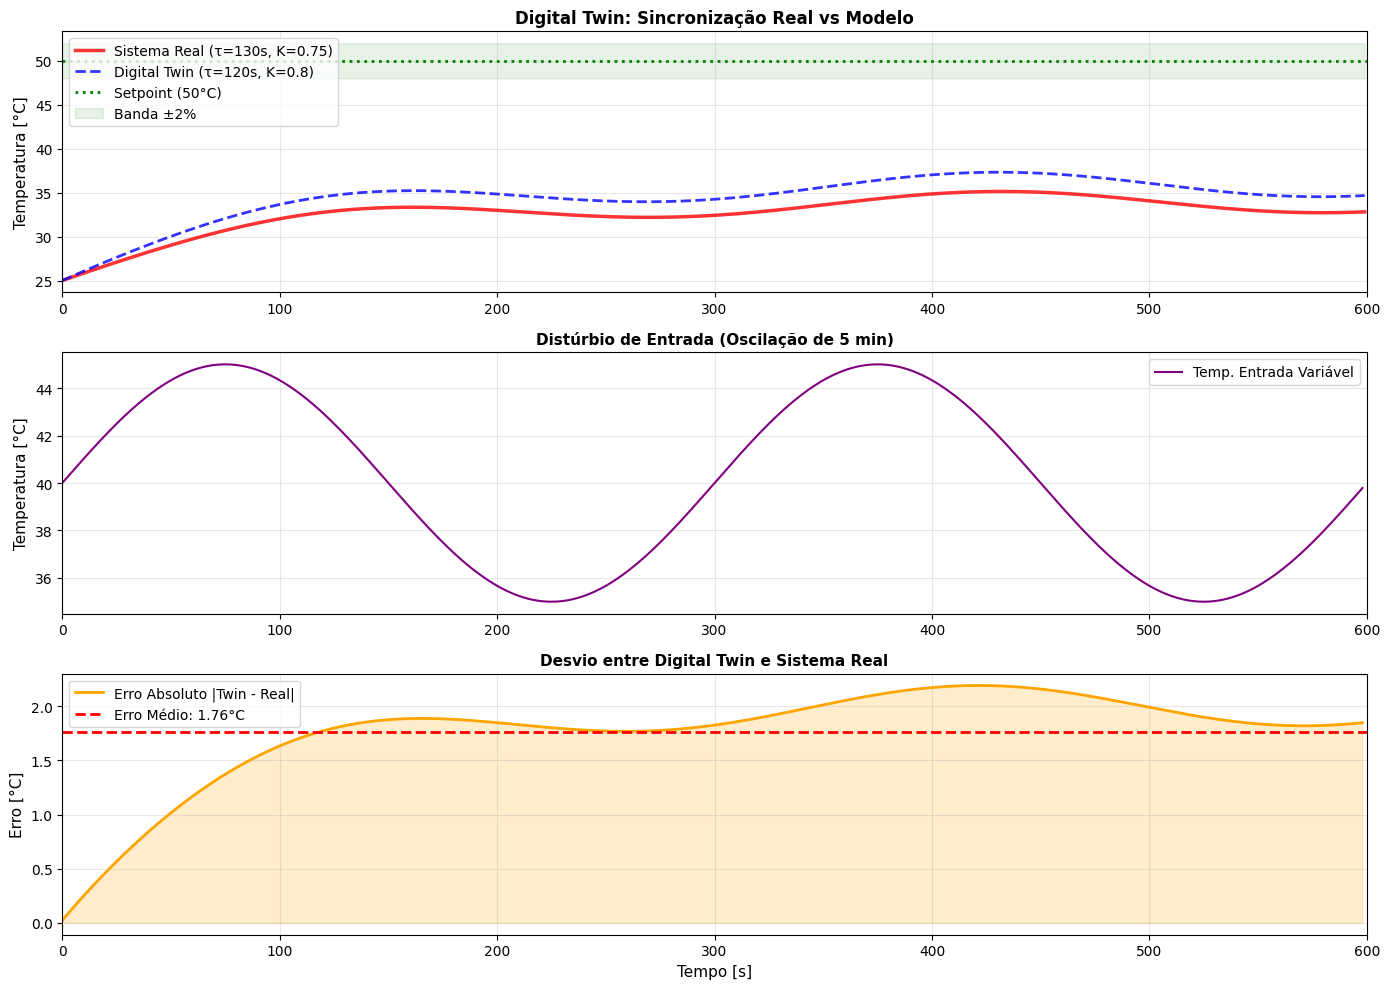


=== ANÁLISE DO DIGITAL TWIN ===

Parâmetros Nominais (Twin):
  τ = 120s, K = 0.8

Parâmetros Reais (Processo):
  τ = 130s (8% maior)
  K = 0.75 (6% menor)

Desempenho do Twin:
  Erro Médio: 1.763°C
  Erro Máximo: 2.192°C
  Erro RMS: 1.816°C

💡 Recomendações:
  - Reestimar parâmetros usando técnicas de identificação a cada 1000 amostras
  - Usar Filtro de Kalman para corrigir desvios sistemáticos
  - Digital Twin adequado para predição 10-60s à frente
  - Implementar em nuvem com atualização a cada 10-30s


In [6]:
# Simulação: Digital Twin de Reator Químico

class ReactorDigitalTwin:
    """Modelo do reator químico para Digital Twin"""

    def __init__(self, tau=120, K=0.8, Kp=0.5):
        """
        Inicializar parâmetros do reator

        Args:
            tau: Constante de tempo [s]
            K: Ganho estático para entrada de temperatura
            Kp: Ganho para potência de aquecimento
        """
        self.tau = tau
        self.K = K
        self.Kp = Kp
        self.T = 25  # Temperatura inicial [°C]

    def step(self, T_in, P, dt):
        """
        Integração numérica de um passo (Euler)

        dT/dt = (1/tau) * (K*T_in - T + Kp*P)
        """
        dTdt = (1/self.tau) * (self.K * T_in - self.T + self.Kp * P)
        self.T = self.T + dTdt * dt
        return self.T

# Criar Digital Twin
twin = ReactorDigitalTwin(tau=120, K=0.8, Kp=0.005)

# Simulação: Comparar modelo vs realidade
dt = 1  # 1 segundo
t_total = 600  # 10 minutos
t_array = np.arange(0, t_total, dt)

# "Realidade" com pequenas diferenças paramétricas
tau_real = 130  # Constante de tempo 8% maior
K_real = 0.75  # Ganho 6% menor

def realidade_planta(T, T_in, P, dt, tau_real, K_real, Kp=0.005):
    """Simular comportamento real com parâmetros ligeiramente diferentes"""
    dTdt = (1/tau_real) * (K_real * T_in - T + Kp * P)
    return T + dTdt * dt

# Históricos
T_twin = [25]  # Digital Twin
T_real = [25]  # Sistema real
T_in_historia = []  # Entrada
P_historia = []  # Potência
erro = []  # Erro de predição

# Entrada variável
for t in t_array[:-1]:
    # Temperatura de entrada oscila
    T_in = 40 + 5 * np.sin(2*np.pi*t/300)  # Oscilação de 5 minutos

    # Controle proporcional simples
    P = 50 * (50 - T_real[-1])  # Tentar manter em 50°C
    P = np.clip(P, 0, 5000)  # Limitar potência

    # Avançar simulações
    T_twin_novo = twin.step(T_in, P, dt)
    T_real_novo = realidade_planta(T_real[-1], T_in, P, dt, tau_real, K_real)

    T_twin.append(T_twin_novo)
    T_real.append(T_real_novo)
    T_in_historia.append(T_in)
    P_historia.append(P)
    erro.append(abs(T_twin_novo - T_real_novo))

# Plotagem
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Temperatura
axes[0].plot(t_array, T_real, 'r-', linewidth=2.5, label='Sistema Real (τ=130s, K=0.75)', alpha=0.8)
axes[0].plot(t_array, T_twin, 'b--', linewidth=2, label='Digital Twin (τ=120s, K=0.8)', alpha=0.8)
axes[0].axhline(y=50, color='g', linestyle=':', linewidth=2, label='Setpoint (50°C)')
axes[0].fill_between(t_array, 48, 52, alpha=0.1, color='green', label='Banda ±2%')
axes[0].set_ylabel('Temperatura [°C]', fontsize=11)
axes[0].set_title('Digital Twin: Sincronização Real vs Modelo', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10, loc='upper left')
axes[0].set_xlim(0, 600)

# Entrada
axes[1].plot(t_array[:-1], T_in_historia, 'purple', linewidth=1.5, label='Temp. Entrada Variável')
axes[1].set_ylabel('Temperatura [°C]', fontsize=11)
axes[1].set_title('Distúrbio de Entrada (Oscilação de 5 min)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)
axes[1].set_xlim(0, 600)

# Erro de predição
axes[2].plot(t_array[:-1], erro, 'orange', linewidth=2, label='Erro Absoluto |Twin - Real|')
axes[2].fill_between(t_array[:-1], 0, erro, alpha=0.2, color='orange')
axes[2].axhline(y=np.mean(erro), color='red', linestyle='--',
                linewidth=2, label=f'Erro Médio: {np.mean(erro):.2f}°C')
axes[2].set_xlabel('Tempo [s]', fontsize=11)
axes[2].set_ylabel('Erro [°C]', fontsize=11)
axes[2].set_title('Desvio entre Digital Twin e Sistema Real', fontsize=11, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].legend(fontsize=10)
axes[2].set_xlim(0, 600)

plt.tight_layout()
plt.show()

# Análise
print("\n=== ANÁLISE DO DIGITAL TWIN ===")
print(f"\nParâmetros Nominais (Twin):")
print(f"  τ = 120s, K = 0.8")
print(f"\nParâmetros Reais (Processo):")
print(f"  τ = 130s (8% maior)")
print(f"  K = 0.75 (6% menor)")
print(f"\nDesempenho do Twin:")
print(f"  Erro Médio: {np.mean(erro):.3f}°C")
print(f"  Erro Máximo: {np.max(erro):.3f}°C")
print(f"  Erro RMS: {np.sqrt(np.mean(np.array(erro)**2)):.3f}°C")
print(f"\n💡 Recomendações:")
print(f"  - Reestimar parâmetros usando técnicas de identificação a cada 1000 amostras")
print(f"  - Usar Filtro de Kalman para corrigir desvios sistemáticos")
print(f"  - Digital Twin adequado para predição 10-60s à frente")
print(f"  - Implementar em nuvem com atualização a cada 10-30s")

## Conclusão

A Indústria 4.0 integra os fundamentos de controle clássico com tecnologias digitais modernas:

### Pilares Teóricos:
1. **Realimentação** (Capítulo 4) → Sensores distribuídos (IIoT)
2. **Desempenho** (Capítulo 5) → Otimização em tempo real (APC)
3. **Estabilidade** (Capítulo 6) → Margens de robustez com atrasos de rede
4. **Controle Digital** (Capítulo 13) → PLCs, controladores em tempo real

### Tecnologias Habilitadoras:
- **OPC-UA / MQTT:** Comunicação segura e em tempo real
- **Digital Twin:** Predição e otimização
- **Machine Learning:** Ajuste adaptativo de controladores
- **Edge Computing:** Processamento local prioritário

### Próximos Passos:
- Implementar em laboratorios com PLC/SCADA reais
- Explorar ML para otimização de ganhos PID
- Investigar segurança cibernética em sistemas críticos
- Participar de projetos de transformação digital